In [1]:
%matplotlib notebook

## Bragg peak progression values and error bars from several outputs, computed with different values of the peak width parameter

In [114]:
mpl.rcParams['font.size']

9.0

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['font.size'] = 8.
mpl.rcParams['font.family'] = 'serif'

golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good
figWidth = 3.37
mpl.rcParams['figure.figsize'] = figWidth, figWidth * golden_ratio

In [3]:
w_15 = np.array([np.array([ 1.        ,  1.05473332,  1.06578211,  1.1085688 ,  1.08285494,
         1.08639277,  1.17664317]),
 np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 np.array([ 1.        ,  0.94026273,  0.92851886,  0.96696775,  0.93781928,
         0.94920423,  0.95996687])])
w_20 = np.array([np.array([ 1.        ,  1.06777415,  1.11282934,  1.13556469,  1.11867025,
         1.12980238,  1.19486332]),
 np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.]),
 np.array([ 1.        ,  0.98015993,  0.9998324,  1.03187026,  0.97397024,
         1.0270189,  1.03754899])])



In [4]:
progressions = [w_15, w_20]
#progressions = [w_20]
mean = np.mean(progressions, axis = 0)
stderr = np.std(progressions, axis = 0)/np.sqrt(len(progressions))
labels = ['111', '200', '222']

In [5]:
fluxes = np.array([ 23080.999908  ,   9472.38824234,   2404.57689574,    447.60799673,
          101.06103334,     58.8079792 ,     30.16713449][::-1])

In [6]:
i0_200_20 = np.array([ 1.        ,  0.87703524,  0.89841387,  0.8849395 ,  0.89060012,
        0.87608614,  0.9418514 ])
i0_200_15 = np.array([ 1.        ,  0.82095889,  0.86219382,  0.82523548,  0.84587632,
        0.85842783,  0.88508954])


In [7]:
i0_200_mean = np.mean([i0_200_20, i0_200_15], axis = 0)
i0_200_stderr = 1.5 * np.std([i0_200_20, i0_200_15], axis = 0)/np.sqrt(len(progressions))

<IPython.core.display.Javascript object>


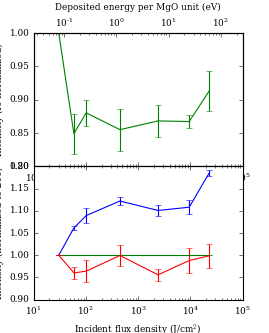

In [8]:
mpl.rcParams['figure.figsize'] = figWidth, figWidth * golden_ratio * 2

fig = plt.figure()

x, y = np.arange(10), np.arange(10)
ax1 = fig.add_subplot(2,1,1)
#ax1.plot(x, y)
ax2 = fig.add_subplot(2,1,2,sharex=ax1)

for curve, err, label in zip(mean, stderr, labels):
    ax2.errorbar(fluxes, curve, yerr=err, label = label)
#ax2.plot(x, y)


ax = fig.add_axes( [0., 0., 1, 1] )
ax.set_axis_off()

#ax.text( 
#    .05, 0.5, "Y Label", rotation='vertical',
#    horizontalalignment='center', verticalalignment='center'
#)



fig.subplots_adjust(hspace=0)

#ax1.xaxis.set_label_position('top')
ax2.semilogx()


ax1.set_ylabel('Intensity (I0 normalized)')
#ax1.get_xaxis().set_visible(False)

xscale = .0026
ax1 = ax1.twiny()
ax1.errorbar(fluxes * xscale, i0_200_mean, yerr=i0_200_stderr, label = label, color = 'g')
ax1.set_xlim((xscale * 1e1, xscale * 1e5))
ax1.semilogx()

ax1.set_xlabel('Deposited energy per MgO unit (eV)')
#ax1.text( 
#    .1, 0.1, "(a)"
#)
ax2.set_xlabel('Incident flux density (J/cm$^2$)')

#y2a = ax2.axes.get_yaxis()
#ticks = y2a.get_ticklabels()
#y2a.set_ticklabels([str(t) for t in ticks])

ax2.set_ylabel('Intensity (normalized to 200)')



In [9]:
scfly_intensities, scfly_ratios = np.genfromtxt('scfly_progression.dat')
vasp_intensities, vasp_ratios = np.genfromtxt('vasp_progression.dat')
vasp_ratios = vasp_ratios[vasp_intensities > 10]
vasp_intensities = vasp_intensities[vasp_intensities > 10]
scfly_vasp_intensities, scfly_vasp_ratios = np.genfromtxt('scfly_vasp_progression.dat')

### AFF model, assuming all XFEL energy goes to O 2p ionization, with a 7.8 eV needed per ionized electron

In [10]:
avogadro = 6.022 * 10**23
to_ev = 6.24e18
peratom = lambda I, mu, M, rho: I * M / (mu * rho * avogadro)
to_ev * 2.4e-17

def flux_to_ev(flux):
    return peratom(flux, .015, 40.3, 3.6) * to_ev

def ev_to_flux(ev):
    return ev / (peratom(1., .015, 40.3, 3.6) * to_ev)

bandgap = 7.8

In [11]:
i200 = np.array([1283.76, 1279.2, 1274.64, 1270.08, 1265.54, 1261., 1256.48, 1251.96, \
1247.44, 1242.94, 1238.45, 1233.96, 1229.48, 1225.01, 1220.55, \
1216.09, 1211.64, 1207.21, 1202.78, 1198.35, 1193.94, 1189.53, \
1185.14, 1180.75, 1176.37, 1171.99, 1167.63, 1163.27, 1158.92, \
1154.58, 1150.25, 1145.92, 1141.61, 1137.3, 1133., 1128.71, 1124.43, \
1120.15, 1115.88, 1111.62, 1107.37, 1103.13, 1098.9, 1094.67, \
1090.45, 1086.24, 1082.04, 1077.84, 1073.66, 1069.48, 1065.31, \
1061.15, 1057., 1052.85, 1048.71, 1044.59, 1040.46, 1036.35, 1032.25, \
1028.15, 1024.06, 1019.98, 1015.91, 1011.85, 1007.79, 1003.74, \
999.705, 995.674, 991.651, 987.636, 983.63, 979.631, 975.641, \
971.659, 967.684, 963.718, 959.761, 955.811, 951.869, 947.936, \
944.011, 940.094, 936.185, 932.284, 928.391, 924.507, 920.63, \
916.762, 912.902, 909.05, 905.206, 901.371, 897.543, 893.724, \
889.912, 886.109, 882.314, 878.528, 874.749, 870.978, 867.216, \
863.462, 859.716, 855.978, 852.248, 848.526, 844.813, 841.108, \
837.41, 833.721, 830.04, 826.367, 822.703, 819.046, 815.398, 811.758, \
808.126, 804.502, 800.886, 797.278, 793.679])
i200 /= np.mean(i200)

dat =  np.genfromtxt('MgO_O2p.txt')
x, i111, _, i220 = dat[:4]
labels  = ['111', '200', '220']

from scipy.interpolate import interp1d
aff_bandgap_intensities = (6/100) * x * bandgap
aff_bandgap_interp = interp1d(aff_bandgap_intensities, i111)
#aff_bandgap_intensities[0] = .1
gauss = lambda mu, sigma: lambda x: np.exp(-((x - mu)**2) / sigma**2)

<IPython.core.display.Javascript object>


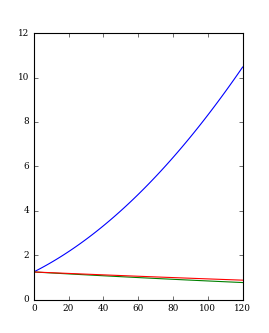

In [13]:
intensity_fractions = np.arange(0, 6, 6/121)
i111_abs, i200_abs, i220_abs = interp1d(intensity_fractions, i111 * i200, fill_value= 'extrapolate'), interp1d(intensity_fractions, i200, fill_value= 'extrapolate'), interp1d(intensity_fractions, i220 * i200, fill_value= 'extrapolate')
plt.plot(i111_abs(intensity_fractions))
plt.plot(i200_abs(intensity_fractions))
plt.plot(i220_abs(intensity_fractions))


hbarc = 1973.
E = 9000.
q= lambda theta: 2 * E/hbarc * np.sin(np.deg2rad(theta/2))
angle = lambda q: np.arcsin(hbarc * q / (2 * E))
peak_angles = np.array([33.5, 38.8, 55.9])
angles = np.arange(25, 65, 0.1)
sigma = 0.4
dw = np.exp(-(0.4)**2 * q(peak_angles)**2)
peakmodels = list(map(gauss, peak_angles, [sigma] * 3))
def pattern(ionization):
    from functools import reduce
    weights = dw * np.array([.028 * i111_abs(6 * ionization), 1.28 * i200_abs(6 * ionization), 1.64 * i220_abs(6 * ionization)])
    print(weights)
    return list(reduce(lambda x, y: x + y, np.array([w * pk(angles)
                                                               for w, pk in zip(weights, peakmodels)])))

In [14]:
dw

array([ 0.33085253,  0.23008807,  0.05363706])

[ 0.01155708  0.36741728  0.10973984]


<IPython.core.display.Javascript object>


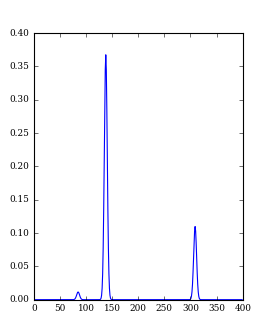

In [15]:
plt.plot(pattern(0))

### Same thing, using 1.5 eV (O electron affinity) instead of the band gap

Note:
* 1st EA: -1.42 kJ/mol
* 2nd EA: +844 kJ/mol

In [16]:
Oea = 1.
aff_ea_intensities = ev_to_flux((6/100) * x * Oea)
aff_ea_interp = interp1d(flux_to_ev(aff_ea_intensities), i111)

In [17]:
pulseavg_factor = 1.9

In [18]:
def shiftx(x, y, factor):
    new_y_interp = interp1d(x * factor, y)
    mask = np.logical_and(min(x * factor) < x, x < max(x * factor))
    newx = x[mask]
    return mask, new_y_interp(newx)

In [19]:
def plot_and_shade_right(x, y, color, factor = 3., label = '',):
    i = np.argsort(x)
    x = x[i]
    y = y[i]
    mask, shifted = shiftx(x, y, factor)
    ax2.plot(x, y, color= color)
    fill_x = x[~mask]
    fill_y = np.repeat(min(shifted), len(fill_x))
    newy = np.concatenate((fill_y, shifted))
    
    ax2.fill_between(x, y, newy, alpha = 0.5, label = label, color = color)

In [123]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(3, 1, height_ratios=[1,1, 3])

<IPython.core.display.Javascript object>


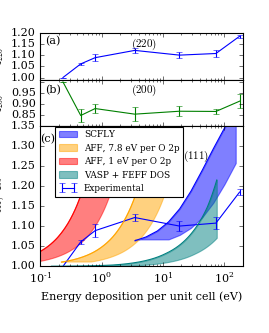

In [141]:
mpl.rcParams['figure.figsize'] = figWidth, figWidth * golden_ratio * 2
mpl.rcParams['font.size'] = 10

fig = plt.figure()

#ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2,sharex=ax1)

ax0 = fig.add_subplot(gs[0])
ax0.text(3, 1.14, '$(220)$')
ax0.semilogx()
ax0.text(0.12, 1.15, '(a)')
ax0.set_ylabel('$I_{220}$')
ax0.set_xlim(0.1, 2e2)
ax0.set_ylim((.99, 1.2))

plt.setp(ax0.get_xticklabels(), visible=False)


ax1 = fig.add_subplot(gs[1])
ax1.text(3, 0.95, '$(200)$')

ax2 = fig.add_subplot(gs[2])#,sharex=ax1)
ax2.text(21, 1.27, '$(111)$')

ax1.set_ylabel('$I_{200}$')

ax = fig.add_axes( [0., 0., 1, 1] )
ax.set_axis_off()


#ax1 = ax1.twiny()
ax1.errorbar(flux_to_ev(fluxes), i0_200_mean, yerr=i0_200_stderr,
             label = label, color = 'g')
ax1.get_yaxis().get_ticklabels()[-1].set_visible(False)

ax1.set_xlim(0.1, 2e2)
ax1.set_ylim((.8, 1.01))
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.text(0.12, .95, '(b)')



x, y = np.arange(10), np.arange(10)
plt.gcf().subplots_adjust(bottom=0.2, left = 0.15)

#for curve, err, label in zip(mean, stderr, labels):
ax0.errorbar(flux_to_ev(fluxes), mean[0], yerr=stderr[0], label = 'Experimental')
ax1.get_yaxis().get_ticklabels()[0].set_visible(False)


ax2.errorbar(flux_to_ev(fluxes), mean[0], yerr=stderr[0], label = 'Experimental')


plot_and_shade_right(flux_to_ev(scfly_intensities), scfly_ratios, 'blue',
                     factor = 3., label = 'SCFLY')

plot_and_shade_right(flux_to_ev(np.arange(15, 3000, 1) * pulseavg_factor),
                     aff_bandgap_interp(flux_to_ev(np.arange(15, 3000, 1))),
         'orange', label = 'AFF, 7.8 eV per O 2p')


plot_and_shade_right(flux_to_ev(np.arange(1, 750, 1) * pulseavg_factor),
                     aff_ea_interp(flux_to_ev(np.arange(1, 750, 1))), 'red', label = 'AFF, 1 eV per O 2p')


# already account for pulse averaging in MgO_VASP
plot_and_shade_right(flux_to_ev(vasp_intensities), vasp_ratios, 'teal', label = 'VASP + FEFF DOS')


ax = fig.add_axes( [0., 0., 1, 1] )
ax.set_axis_off()

ax2.set_ylim((1., 1.35))

fig.subplots_adjust(hspace=0)

ax1.semilogx()
ax2.semilogx()

xscale = .0026

ax2.set_xlabel('Energy deposition per unit cell (eV)')
ax2.set_ylabel('$I_{111}/I_{200}$')
ax2.text(0.1, 1.31, '(c)')


ax2.set_xlim(0.1, 2e2)
handles, labelsrev = ax2.get_legend_handles_labels()

#handles = [h[0] for h in handles]
leg = ax2.legend(handles, labelsrev, loc='upper center', ncol = 1,
               bbox_to_anchor = (0.39, 1.03), prop = {'size' : 8})#, numpoints=1)



In [92]:
fig.savefig('experimental_vs_scfly_vasp_exciton_shaded.svg', dpi = 300, bbox_inches='tight')

In [142]:
fig.savefig('experimental_vs_scfly_vasp_exciton_shaded.png', dpi = 300, bbox_inches='tight')

<IPython.core.display.Javascript object>


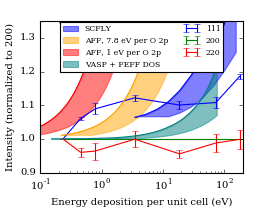

In [111]:
mpl.rcParams['figure.figsize'] = figWidth, figWidth * golden_ratio * 1.3
mpl.rcParams['font.size'] = 9


#plt.tight_layout()

fig = plt.figure()

x, y = np.arange(10), np.arange(10)
ax2 = fig.add_subplot(1,1,1)
plt.gcf().subplots_adjust(bottom=0.2, left = 0.15)

for curve, err, label in zip(mean, stderr, labels):
    ax2.errorbar(flux_to_ev(fluxes), curve, yerr=err, label = label)


plot_and_shade_right(flux_to_ev(scfly_intensities), scfly_ratios, 'blue',
                     factor = 3., label = 'SCFLY')

plot_and_shade_right(flux_to_ev(np.arange(15, 3000, 1) * pulseavg_factor),
                     aff_bandgap_interp(flux_to_ev(np.arange(15, 3000, 1))),
         'orange', label = 'AFF, 7.8 eV per O 2p')


plot_and_shade_right(flux_to_ev(np.arange(1, 750, 1) * pulseavg_factor),
                     aff_ea_interp(flux_to_ev(np.arange(1, 750, 1))), 'red', label = 'AFF, 1 eV per O 2p')


# already account for pulse averaging in MgO_VASP
plot_and_shade_right(flux_to_ev(vasp_intensities), vasp_ratios, 'teal', label = 'VASP + FEFF DOS')


ax = fig.add_axes( [0., 0., 1, 1] )
ax.set_axis_off()

ax2.set_ylim((0.9, 1.35))

fig.subplots_adjust(hspace=0)

ax2.semilogx()

xscale = .0026

ax2.set_xlabel('Energy deposition per unit cell (eV)')
ax2.set_ylabel('Intensity (normalized to 200)')
ax2.set_xlim(0.1, 2e2)
handles, labelsrev = ax2.get_legend_handles_labels()

#handles = [h[0] for h in handles]
leg = ax2.legend(handles, labelsrev, loc='upper center', ncol = 2,
               bbox_to_anchor = (0.5, 1.02), prop = {'size' : 7})#, numpoints=1)


In [117]:
fig.savefig('experimental_vs_scfly_vasp_exciton_shaded.png', dpi = 300, bbox_inches='tight')

### Model prediction

### LTE model:

<IPython.core.display.Javascript object>


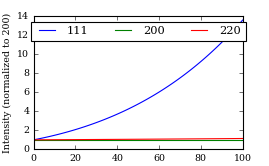

<IPython.core.display.Javascript object>


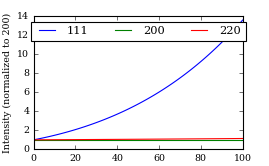

In [21]:
def plot_lte(dat, lcoords = (0.5, 1.)):
    x, i111, i200, i220 = dat[:4]
    labels  = ['111', '200', '220']

    mpl.rcParams['figure.figsize'] = figWidth, figWidth * golden_ratio

    # First illustrate basic pyplot interface, using defaults where possible.
    fig  = plt.figure()

    for curve, label in zip([i111, i200, i220], labels):
        plt.plot(x, curve, label = label)

    #plt.semilogx()
    #plt.ylim((0.9, 1.25))
    # remove the errorbars from the legend
    ax = fig.axes[0]
    handles, labels = ax.get_legend_handles_labels()
    plt.xlabel('Ionization fraction (percent)')
    plt.ylabel('Intensity (normalized to 200)')
    
    handles = [h for h in handles]
    leg = ax.legend(handles, labels, loc='upper center', ncol = 3,
               bbox_to_anchor = lcoords)#, numpoints=1)
    return fig

dat =  np.genfromtxt('MgO_O2p.txt')
plot_lte(dat)


In [183]:
d = np.genfromtxt('MgO_simultaneous_r0.75.dat')

In [223]:
x = d[0][::2]
i111 = d[0][1::2]
i200 = d[1][1::2]
i220 = d[2][1::2]

<IPython.core.display.Javascript object>


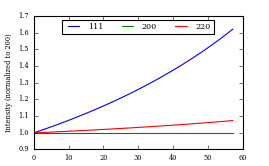

In [224]:
fig = plot_lte([x, i111, i200, i220], lcoords = (0.5, 1.))

In [220]:
fig.savefig('model2.png', dpi = 300, bbox_inches='tight')

In [201]:
plt.plot(i111)
plt.show()

In [180]:
!mv MgO_simultaneous_r0.75\ \(1\).dat MgO_simultaneous_r0.75.dat

In [182]:
pd.read_csv('MgO_simultaneous_r0.75.dat');

<IPython.core.display.Javascript object>


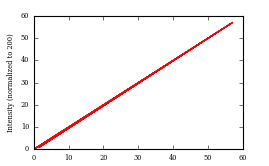

In [199]:
plot_lte('MgO_simultaneous_r0.75.dat')

In [ ]:
plot_lte('')

In [161]:
fig.savefig('prediction.png', dpi = 300, bbox_inches='tight')

In [3]:
import pandas as pd
import cufflinks
import plotly.plotly as py
py.sign_in('revilo222', 'qnGBeolE0CtdzjEajfql')